In [1]:
# Import necessary libraries
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
results_file = "evaluation_old.json"
with open(results_file, 'r') as f:
    data = json.load(f)

In [3]:
models_data = []
for model in data['models']:
    model_name = model['model_name']
    for checkpoint in model['checkpoint']:
        checkpoint_name = checkpoint['model_checkpoint']
        for dataset in checkpoint['val_datasets']:
            dataset_name = dataset['dataset_name']
            dataset_name = dataset_name.replace('.txt', '').replace('_val_lab', '')
            dataset_name = pd.Series(dataset_name).str.replace(r'^E\d+_', '', regex=True).iloc[0]
            metrics = dataset['metrics']
            num_samples = dataset['num_samples']
            models_data.append({
                "model_name": model_name,
                "checkpoint": checkpoint_name,
                "dataset": dataset_name,
                **metrics,
                "num_samples": num_samples
            })

In [4]:
df = pd.DataFrame(models_data)

In [5]:
def static_plot():
    df['checkpoint'] = df.apply(
        lambda row: 'high_res_img' if row['model_name'] == 'resnet18' and row['checkpoint'] == 'model_epoch_5.pth' else
                    'low_res_img' if row['model_name'] == 'resnet18' and row['checkpoint'] == 'model_epoch_4.pth' else 
                    '',
        axis=1
    )
    df['model_checkpoint'] = df['model_name'] + df['checkpoint'].apply(lambda x: f" ({x})" if x else "")
    numeric_cols = ['macer_at_bpcer']
    grouped = df.groupby(["model_checkpoint", "dataset"])[numeric_cols].mean()
    macer_data = grouped['macer_at_bpcer'].unstack()
    macer_data.plot(kind='bar', figsize=(12, 6), alpha=0.8, edgecolor='black')
    plt.title("MACER@BPCER=0.01 by Dataset for Each Model", fontsize=16)
    plt.ylabel("MACER@BPCER=0.01", fontsize=14)
    plt.xlabel("Model", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.legend(title="Dataset", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

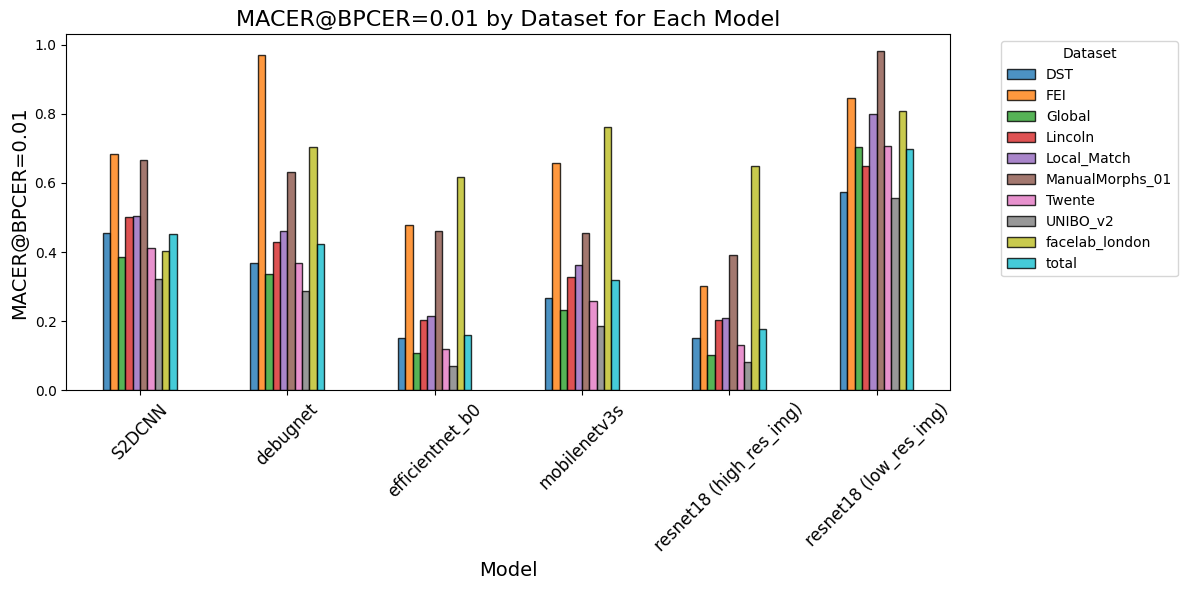

In [6]:
static_plot()

In [7]:
def static_plot_total():
    df['checkpoint'] = df.apply(
        lambda row: 'high_res_img' if row['model_name'] == 'resnet18' and row['checkpoint'] == 'model_epoch_5.pth' else
                    'low_res_img' if row['model_name'] == 'resnet18' and row['checkpoint'] == 'model_epoch_4.pth' else 
                    row['checkpoint'],
        axis=1
    )
    df['model_checkpoint'] = df['model_name'] + df['checkpoint'].apply(lambda x: f" ({x})" if x else "")
    total_data = df[df['dataset'] == 'total']
    metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'macer', 'bpcer', 'macer_at_bpcer']
    metric_data = total_data.groupby("model_checkpoint")[metrics].mean()
    metric_data.plot(kind='bar', figsize=(12, 6), alpha=0.8, edgecolor='black')
    plt.title("All Metrics by Model and Checkpoint for Total Dataset", fontsize=16)
    plt.ylabel("Metric Value", fontsize=14)
    plt.xlabel("Model and Checkpoint", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

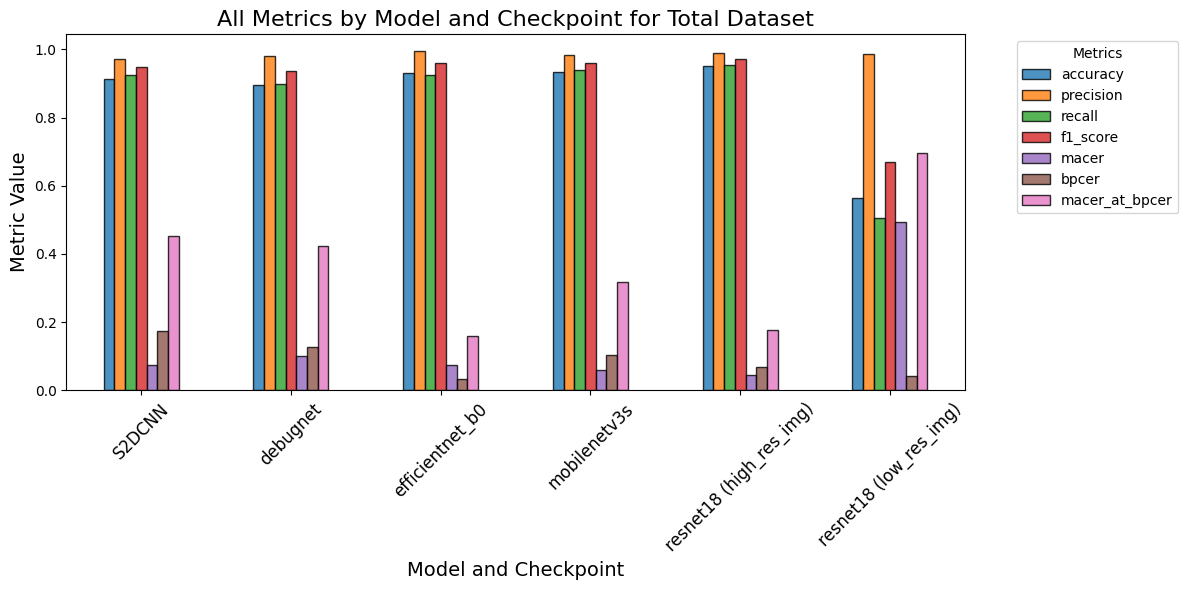

In [8]:
static_plot_total()